In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from scipy.signal import argrelextrema

from sklearn.cluster import KMeans

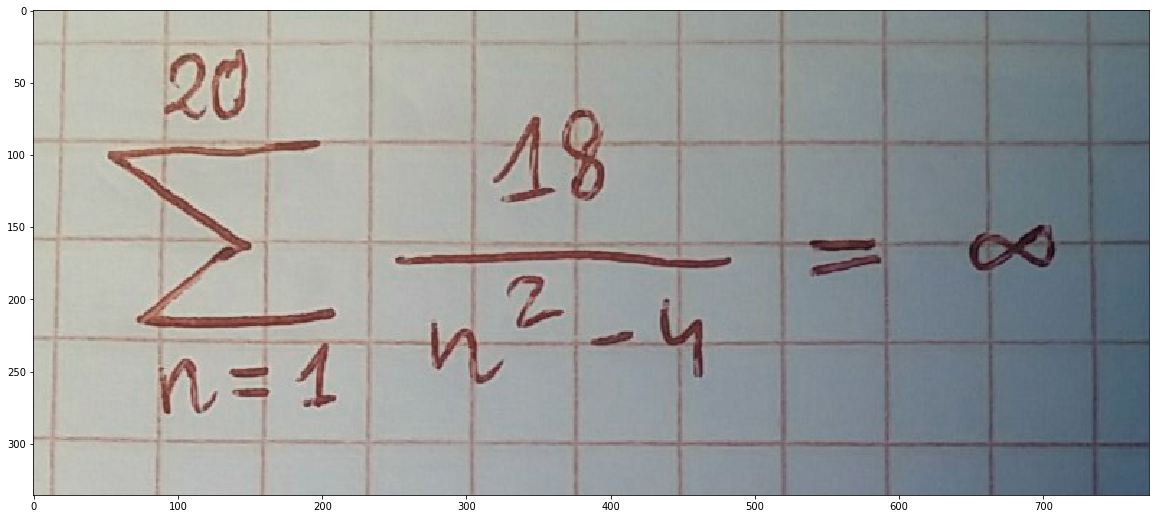

In [97]:
# read in and plot image
graph1 = mpimg.imread("sample1.png")
plt.figure(figsize=(20,10))
plt.imshow(graph1);

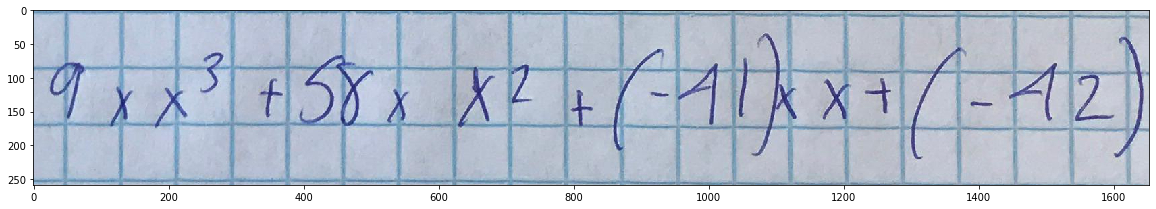

In [2]:
# read in and plot image
graph = mpimg.imread("graph_paper_ex.jpg")
plt.figure(figsize=(20,10))
plt.imshow(graph);

In [9]:
# read image in cv2
graph2 = cv2.imread("graph_paper_ex.jpg")

print("Image data dimensions for sample2 are:", graph2.shape)
print("Image data type for sample2 is:", graph2.dtype)

Image data dimensions for sample2 are: (259, 1653, 3)
Image data type for sample2 is: uint8


In [19]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([graph2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [10]:
# convert the image to grayscale to concentrate on one channel only
graph2gray = cv2.cvtColor(graph2, cv2.COLOR_BGR2GRAY)
print("Image data dimensions for sample2 are:", graph2gray.shape)
print("Image data type for sample2 is:", graph2gray.dtype)

Image data dimensions for sample2 are: (259, 1653)
Image data type for sample2 is: uint8


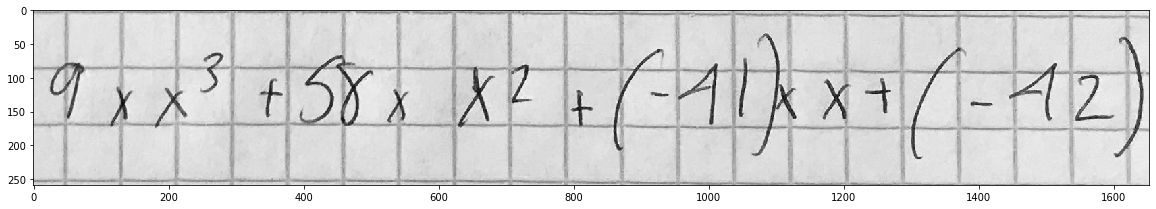

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(graph2gray,cmap='Greys_r');

In [13]:
# plot pixel values as a histogram
hist = cv2.calcHist(images=[graph2], channels=[0], mask=None, histSize=[256], ranges=[0,256])

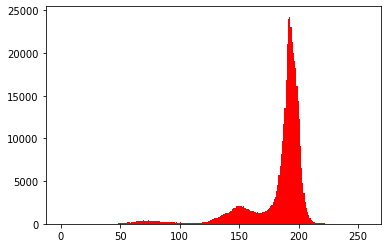

In [22]:
plt.hist(graph2gray.ravel(),256,[0,256],color="red")
plt.show()

In [31]:
# try some simple thresholding measure
# maxValue is the value to be given if the pixel value is more than the threshold
thresh = 110
maxValue = 255
ret, thresh1 = cv2.threshold(graph2gray, thresh, maxValue, cv2.THRESH_BINARY)

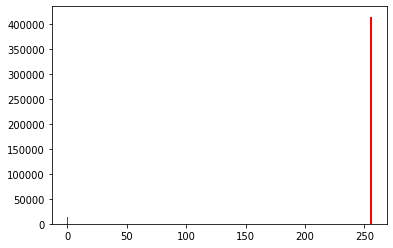

In [32]:
plt.hist(thresh1.ravel(),256,[0,256],color="red")
plt.show()

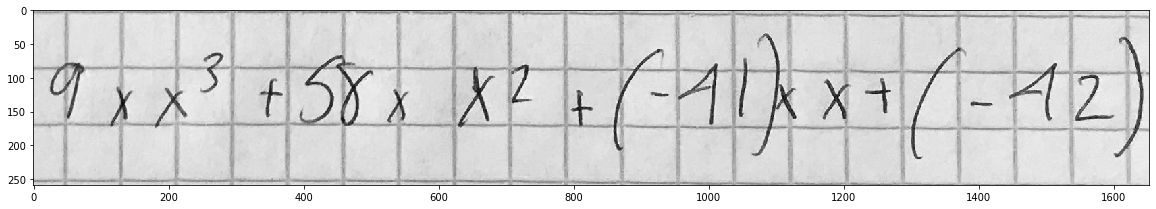

In [34]:
plt.figure(figsize=(20,10))
plt.imshow(graph2gray,cmap='Greys_r');

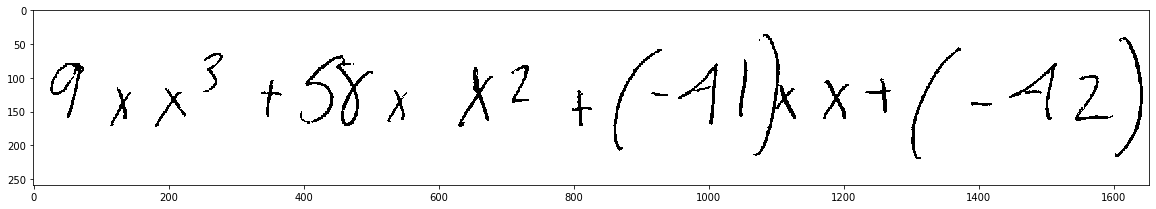

In [33]:
plt.figure(figsize=(20,10))
plt.imshow(thresh1,cmap='Greys_r');

In [52]:
graph1 = cv2.imread("sample1.png")
graph1gray = cv2.cvtColor(graph1, cv2.COLOR_BGR2GRAY)

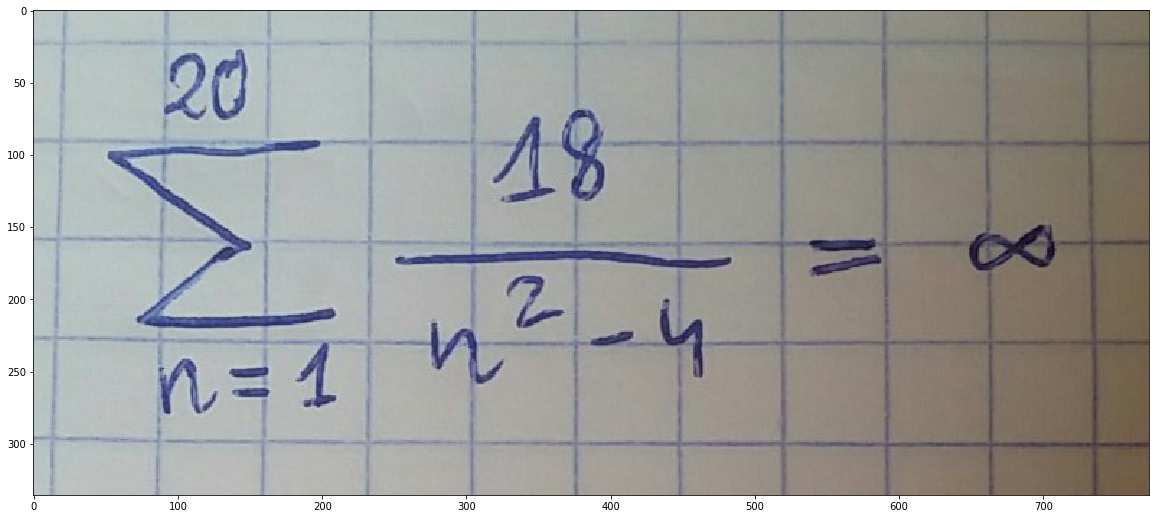

In [54]:
plt.figure(figsize=(20,10))
plt.imshow(graph1);

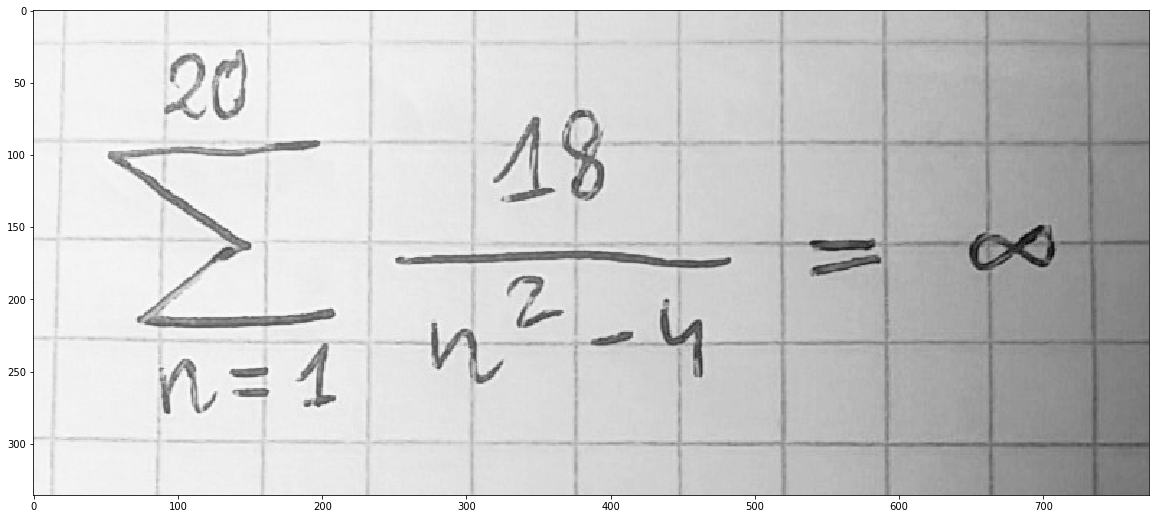

In [57]:
plt.figure(figsize=(20,10))
plt.imshow(graph1gray,cmap='Greys_r');

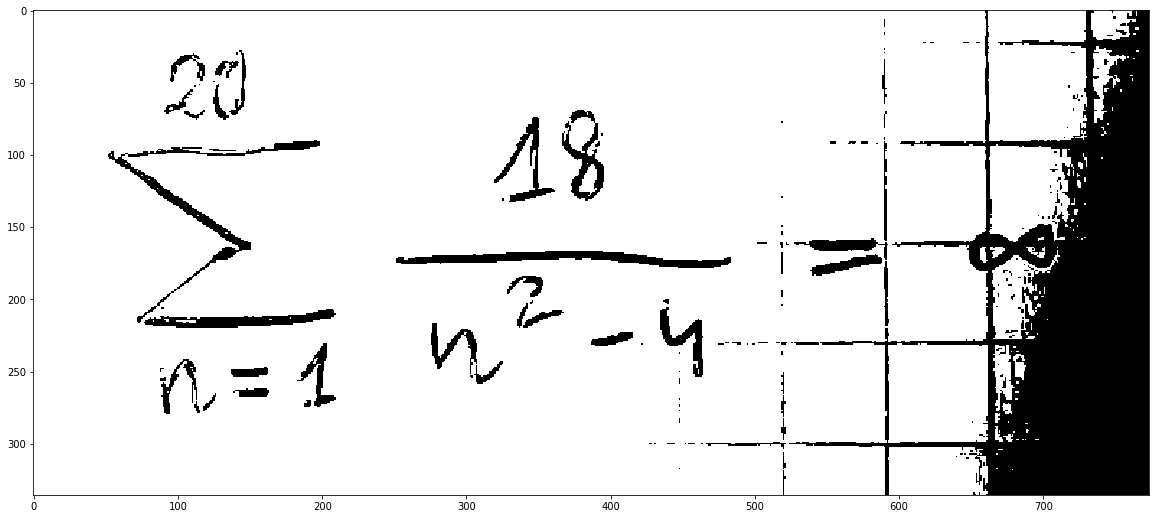

In [61]:
# try some simple thresholding measure
# maxValue is the value to be given if the pixel value is more than the threshold
thresh = 110
maxValue = 255
ret, thresh2 = cv2.threshold(graph1gray, thresh, maxValue, cv2.THRESH_BINARY)
plt.figure(figsize=(20,10))
plt.imshow(thresh2,cmap='Greys_r');

# Method 2: Subtract the background from the original image in order to get rid of the shadow.

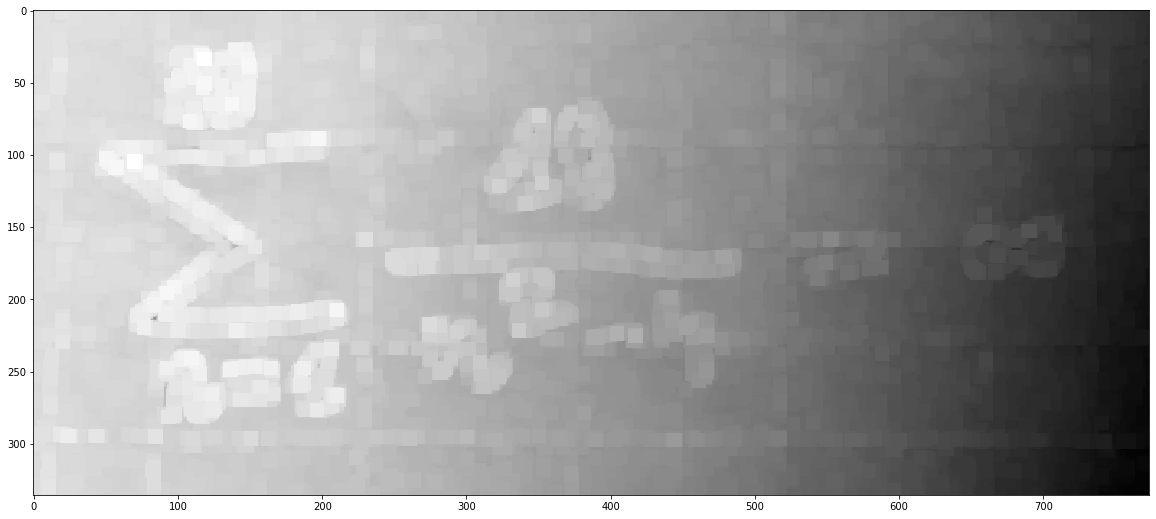

In [169]:
### Step 1: Obtain background only ###

# read in image
img = cv2.imread("sample1.png")

# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# dilate the image in order to get ride of the math
dilated_img = cv2.dilate(gray_img, np.ones((10,10), np.uint8))

# show dilated image
plt.figure(figsize=(20,10))
plt.imshow(dilated_img,cmap='gray');

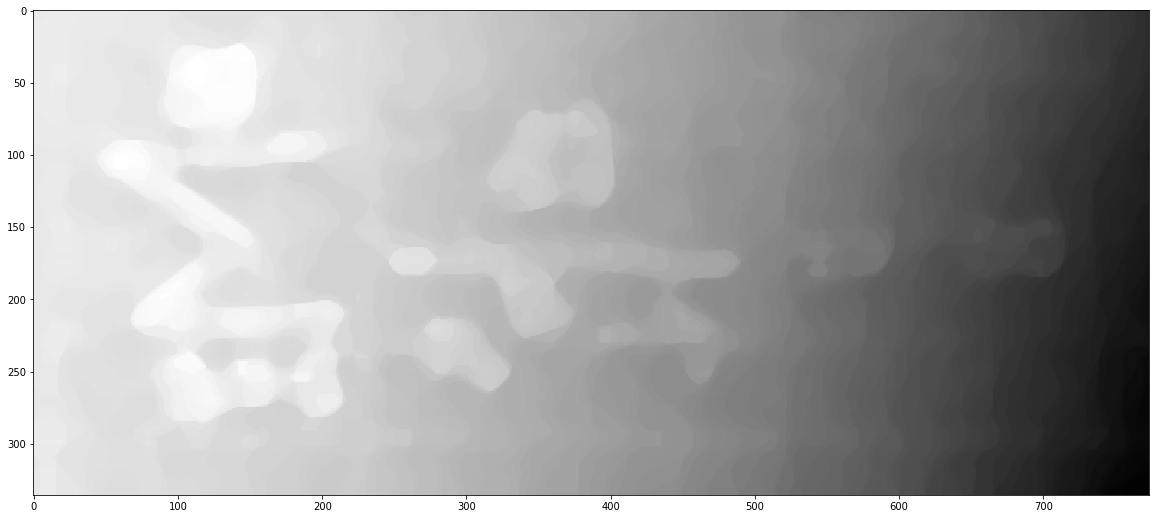

In [170]:
### Step 2: Blur ### 
# suppress anything else with a blur function

blur_img = cv2.medianBlur(dilated_img, 21)

# show blurred image
plt.figure(figsize=(20,10))
plt.imshow(blur_img,cmap='gray');

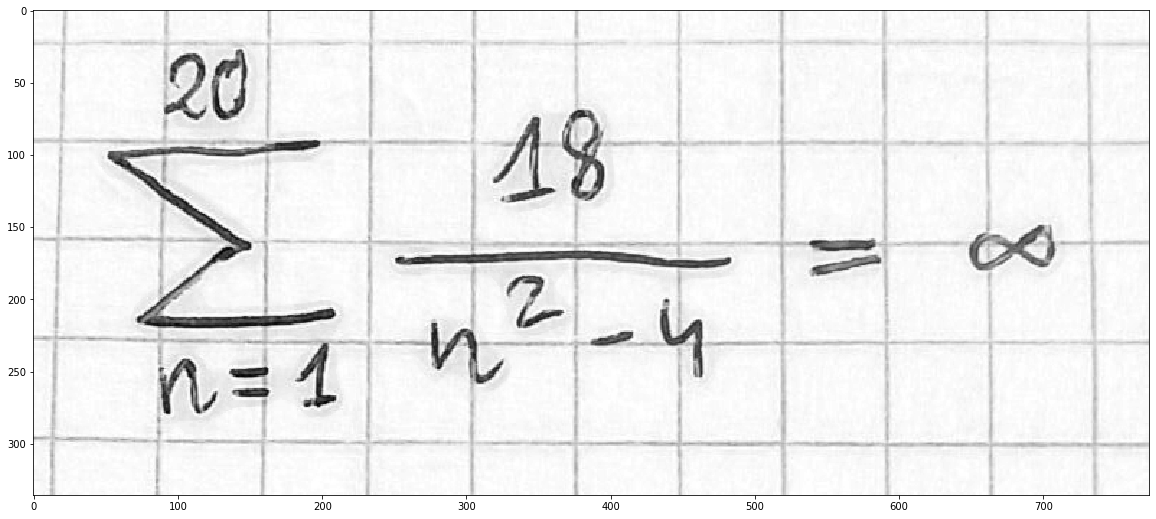

In [171]:
### Step 3: Calculate the difference between the original and background just made ###
# identical bits will be black (close to zero difference), text will be white (large difference)

diff_img = 255 - cv2.absdiff(gray_img, blur_img)
plt.figure(figsize=(20,10))
plt.imshow(diff_img,cmap='gray');

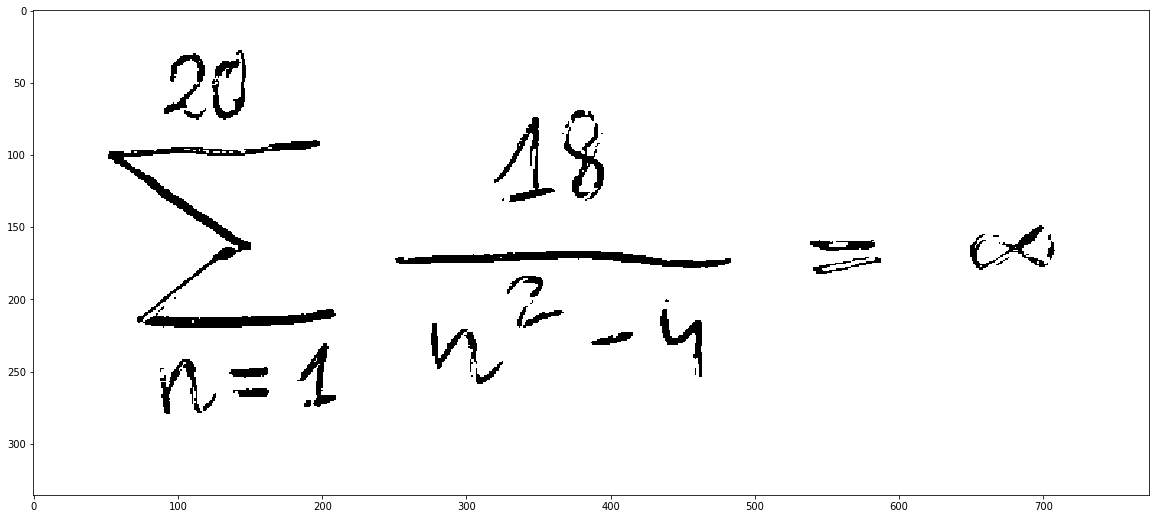

In [172]:
### Step 4: Apply Simple Threshold ###
thresh = 175
maxValue = 255
ret, thresh2 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY)
plt.figure(figsize=(20,10))
plt.imshow(thresh2,cmap='Greys_r');

Other things that I tried that did not work: 
- kMeans clustering (although maybe I did not figure this out completely)
- Laplachian filtering --> really did not work

# Other Thresholding Options 

Otsu Binarization automatically calculates a threshold value from an image histogram for a BIMODAL image. For images that are not bimodal, binarization may not be accurate. 

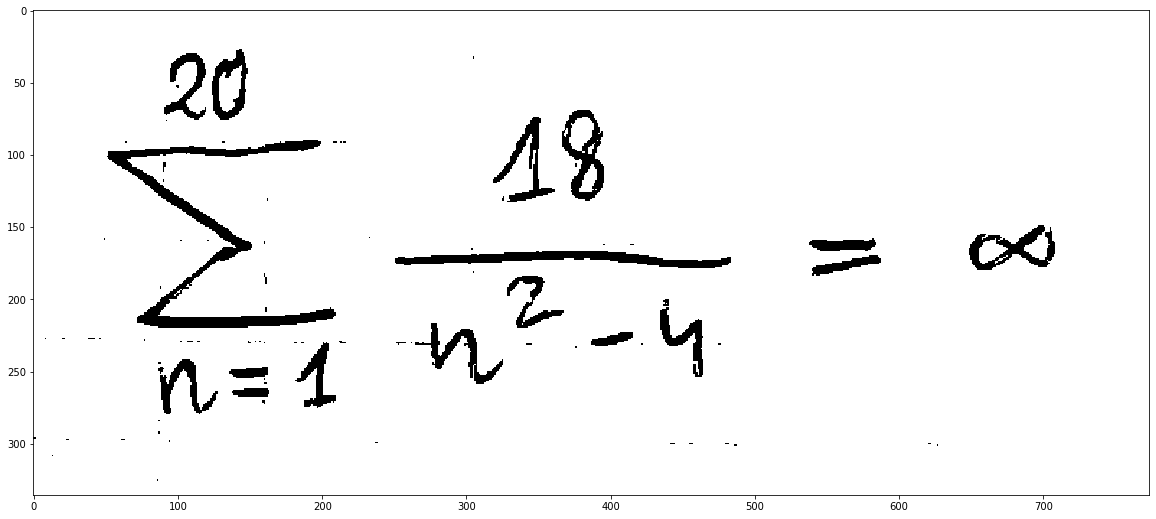

In [147]:
thresh = 0
maxValue = 255
ret, thresh3 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(20,10))
plt.imshow(thresh3,cmap='Greys_r');

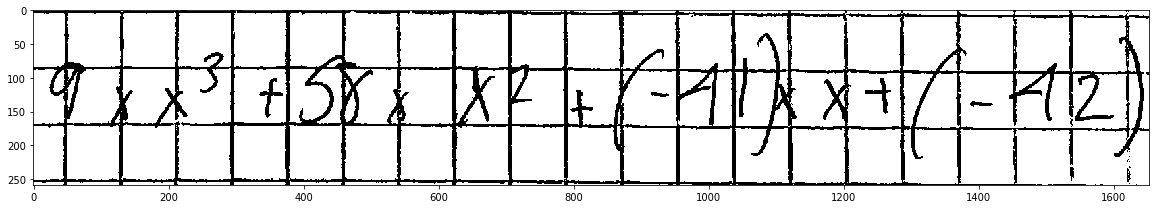

In [158]:
img = cv2.imread("graph_paper_ex.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = 0
maxValue = 255
ret, thresh3 = cv2.threshold(gray_img, thresh, maxValue, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(20,10))
plt.imshow(thresh3,cmap='Greys_r');

So clearly Otsu's binarization does not work for examples that have not gone through the background removal process. I will then try to pass images that do not need shadow removal through the script anyways and see if this can be resolved.

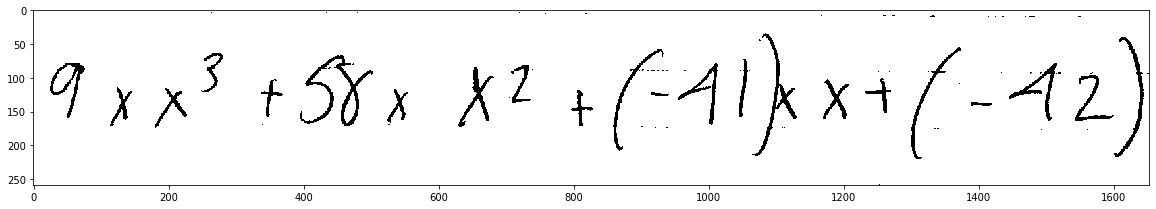

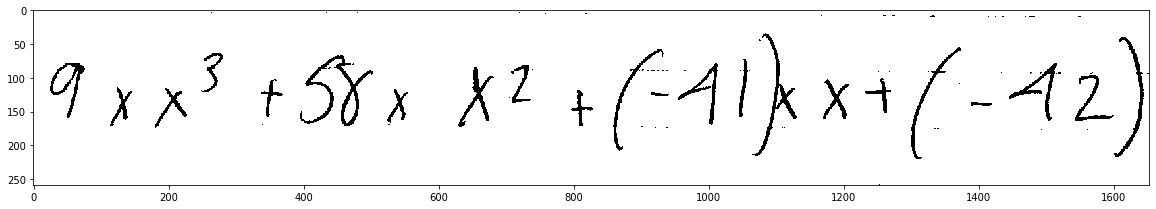

In [167]:
### Full script for background subtraction ###

### Step 1: Obtain background only ###

# read in image
img = cv2.imread("graph_paper_ex.jpg")

# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# dilate the image in order to get ride of the math
dilated_img = cv2.dilate(gray_img, np.ones((10,10), np.uint8))

# show dilated image
# plt.figure(figsize=(20,10))
# plt.imshow(dilated_img,cmap='gray');

### Step 2: Blur ### 
# suppress anything else with a blur function

blur_img = cv2.medianBlur(dilated_img, 21)

### Step 3: Calculate the difference between the original and background just made ###
# identical bits will be black (close to zero difference), text will be white (large difference)

diff_img = 255 - cv2.absdiff(gray_img, blur_img)

### Step 4: Apply Simple Threshold ###
thresh = 175
maxValue = 255
ret, thresh2 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY)
plt.figure(figsize=(20,10))
plt.imshow(thresh2,cmap='Greys_r');

### Other Option - Step 4: Apply Otsu Binarization ###
thresh = 0
maxValue = 255
ret, thresh3 = cv2.threshold(thresh2, thresh, maxValue, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(20,10))
plt.imshow(thresh3,cmap='Greys_r');

# Test images - Is the method good enough? 
Last test: 8-21-2019

/Users/utoarca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/Users/utoarca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


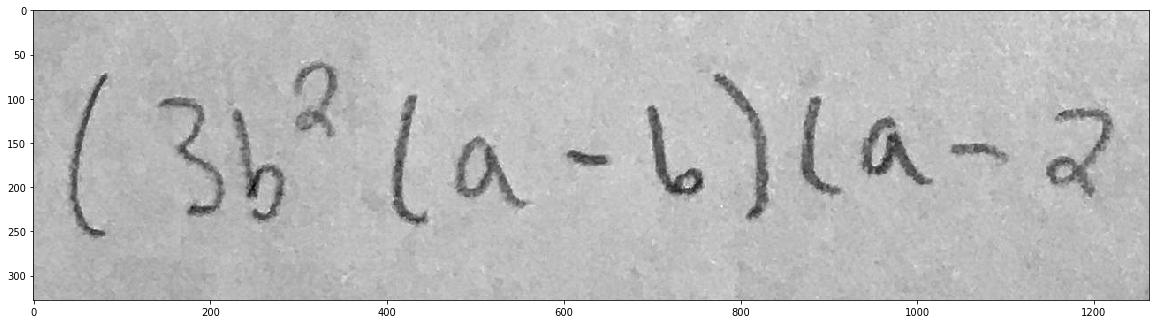

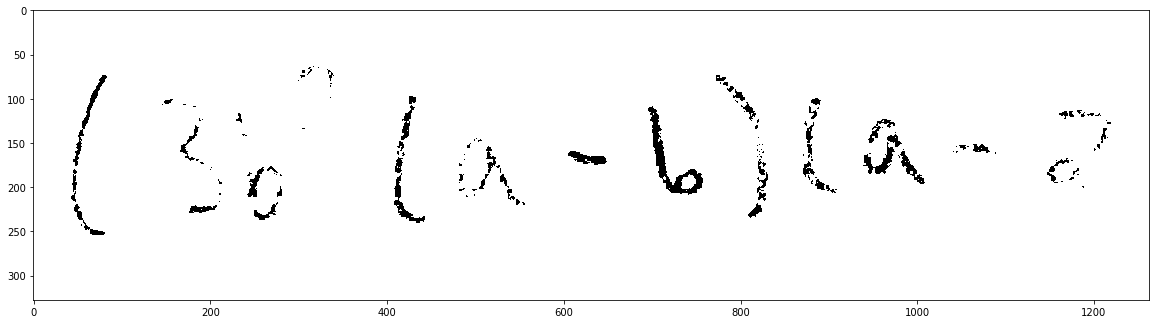

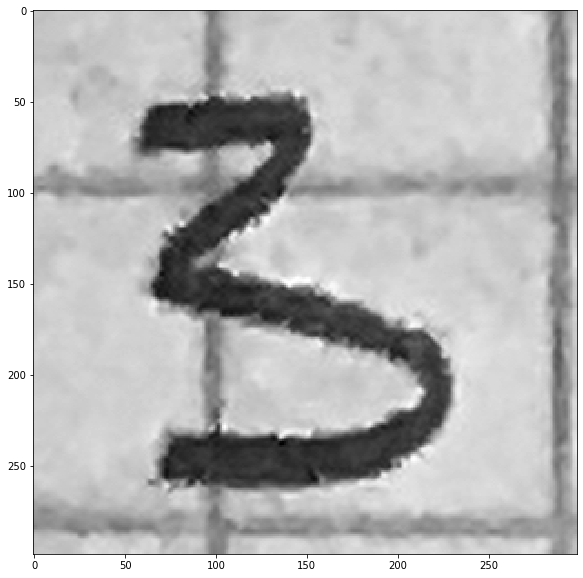

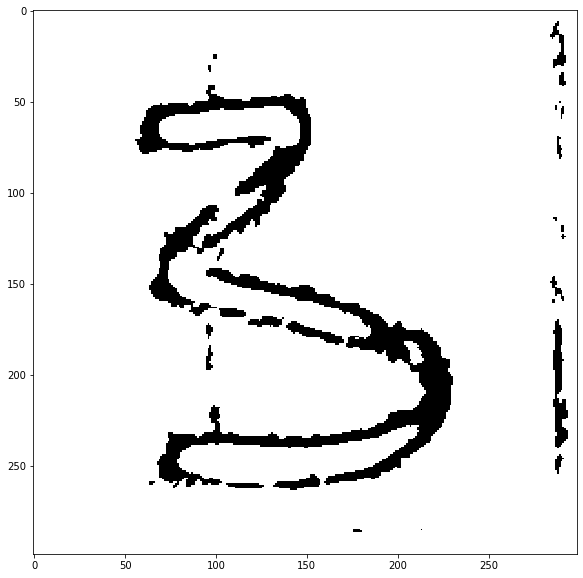

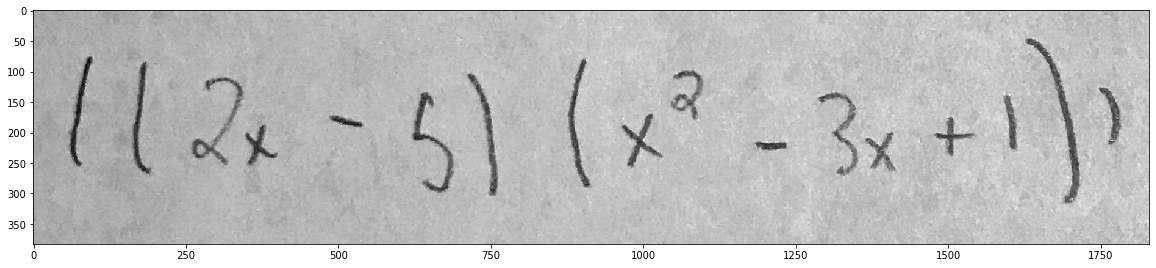

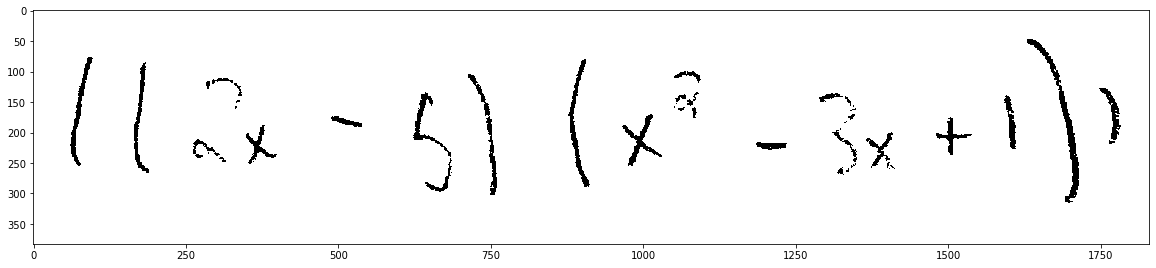

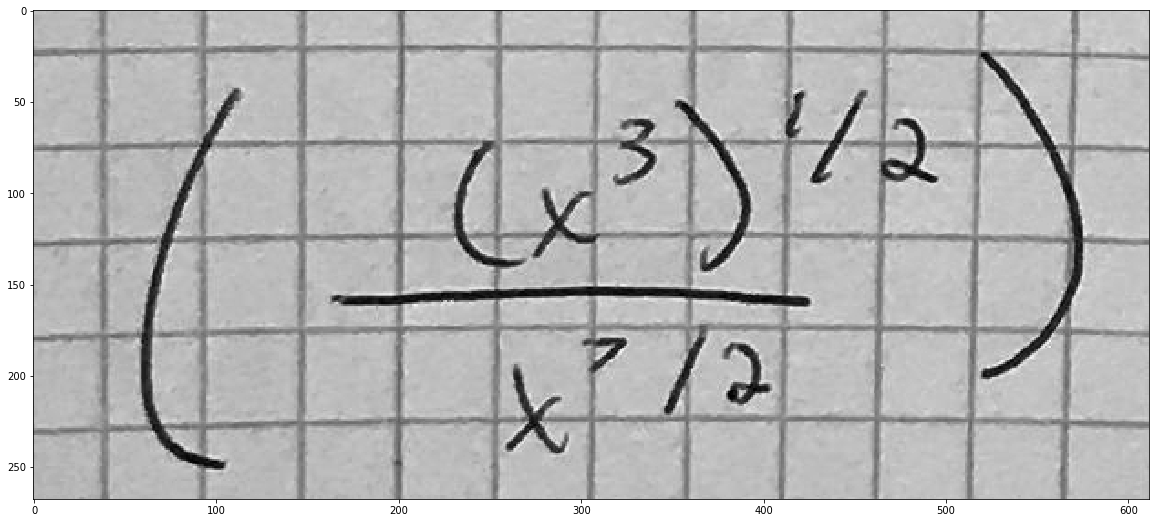

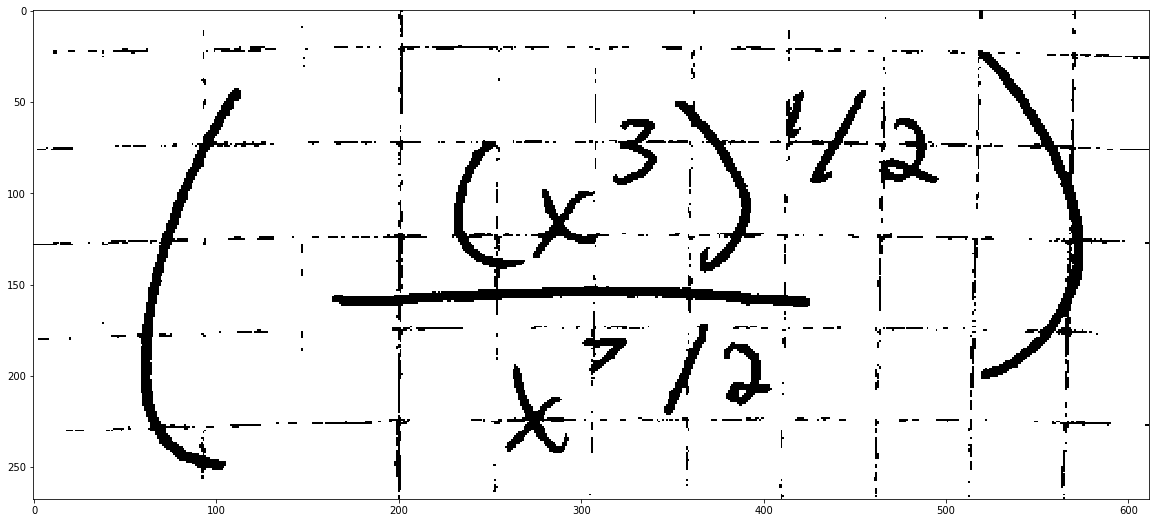

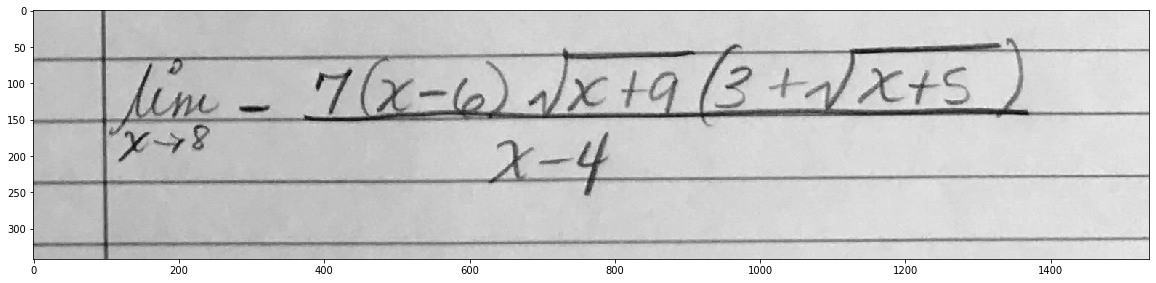

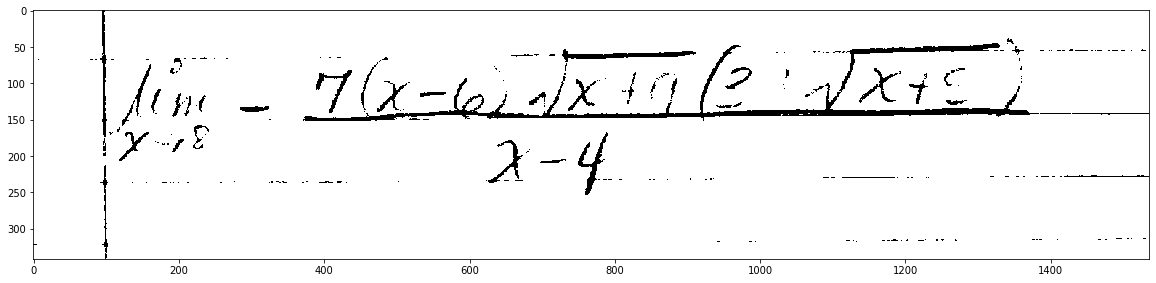

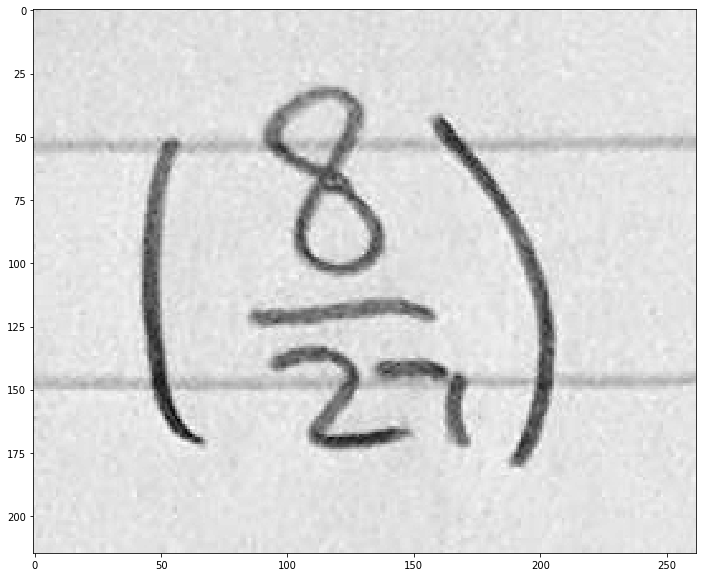

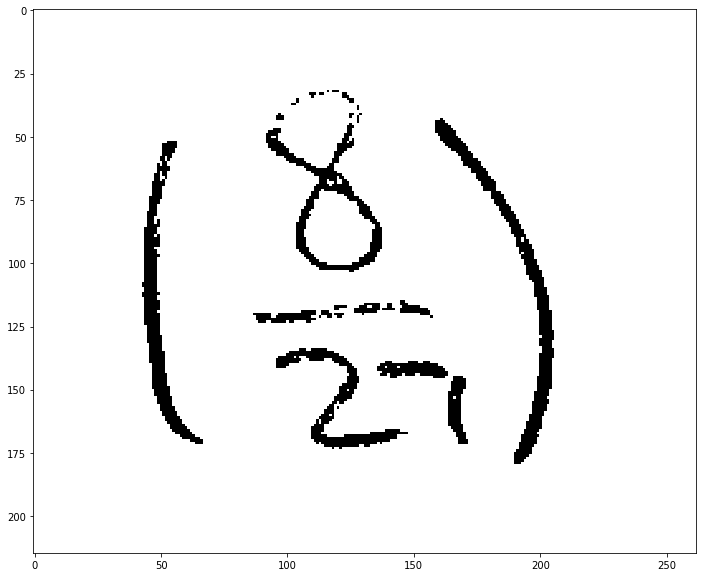

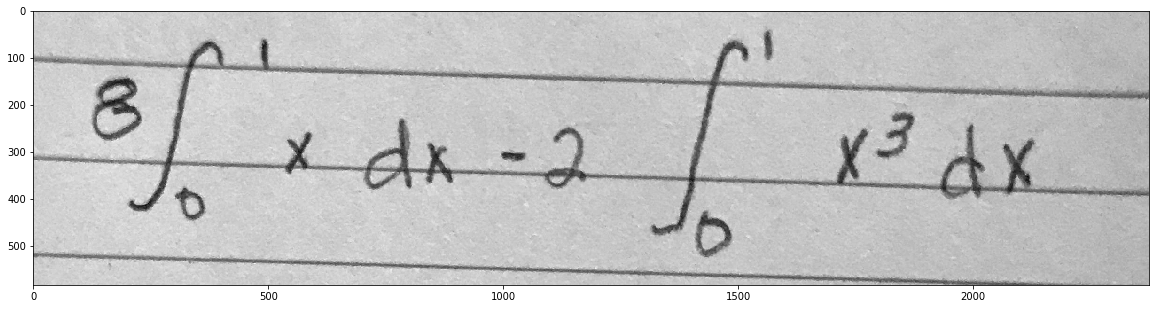

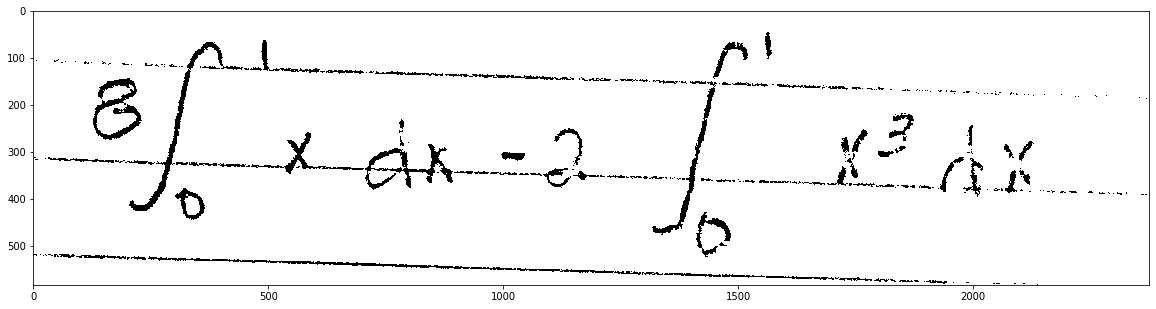

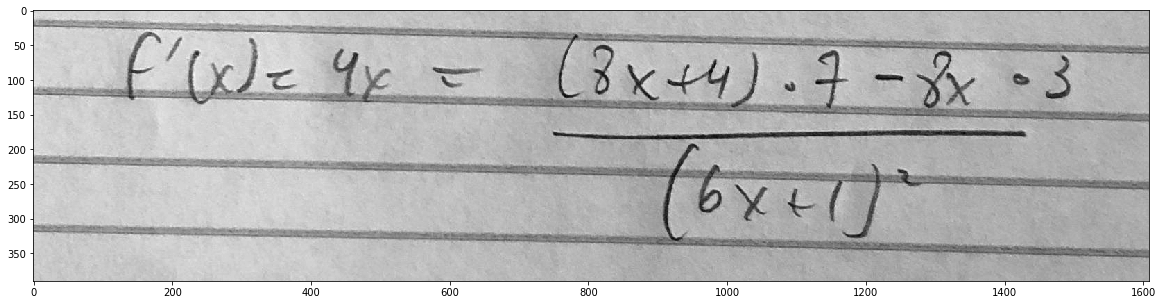

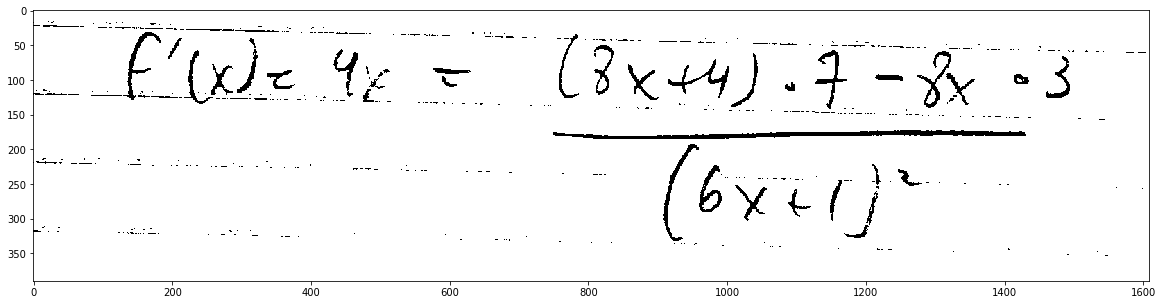

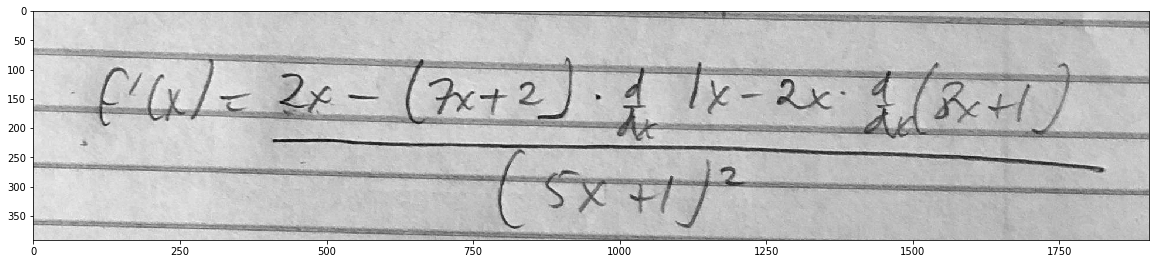

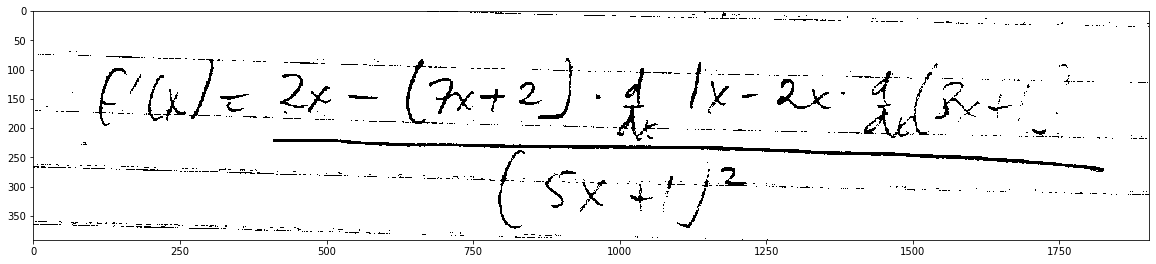

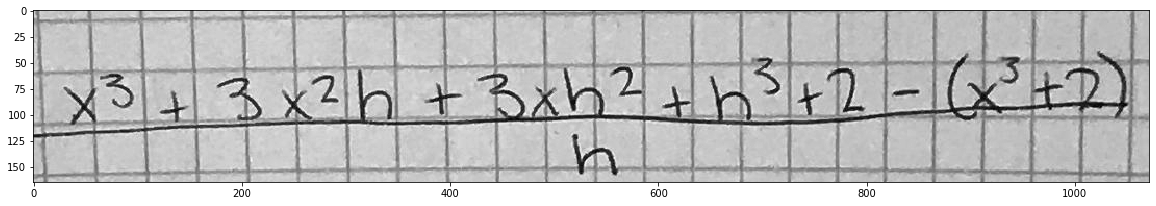

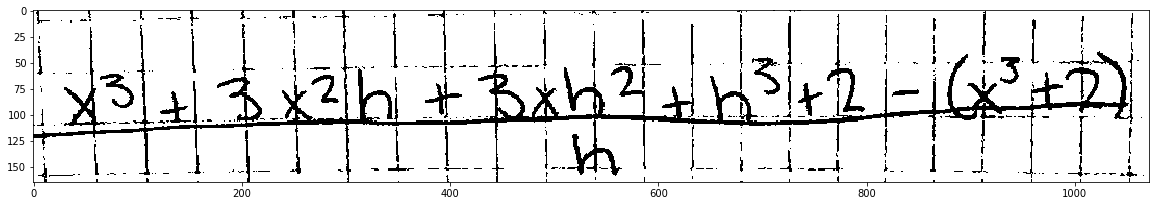

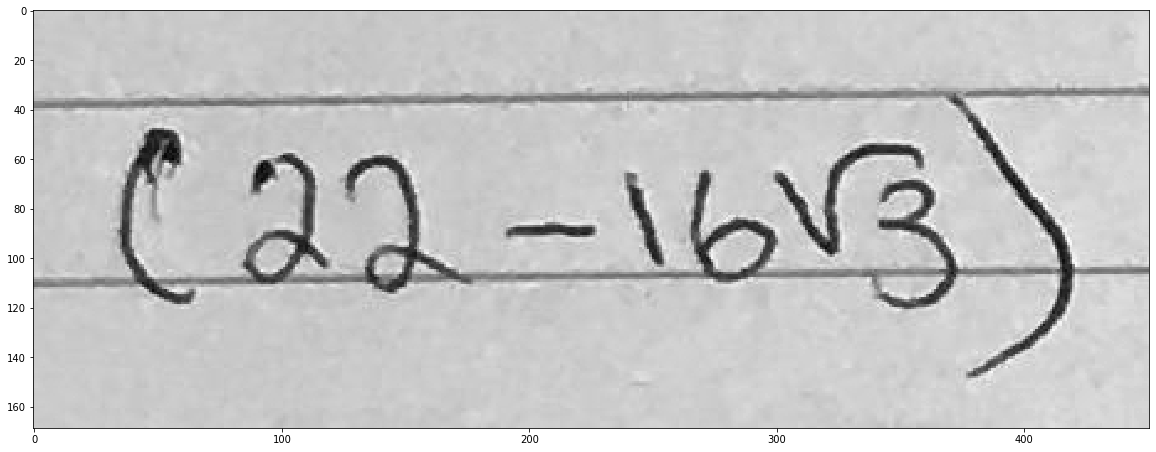

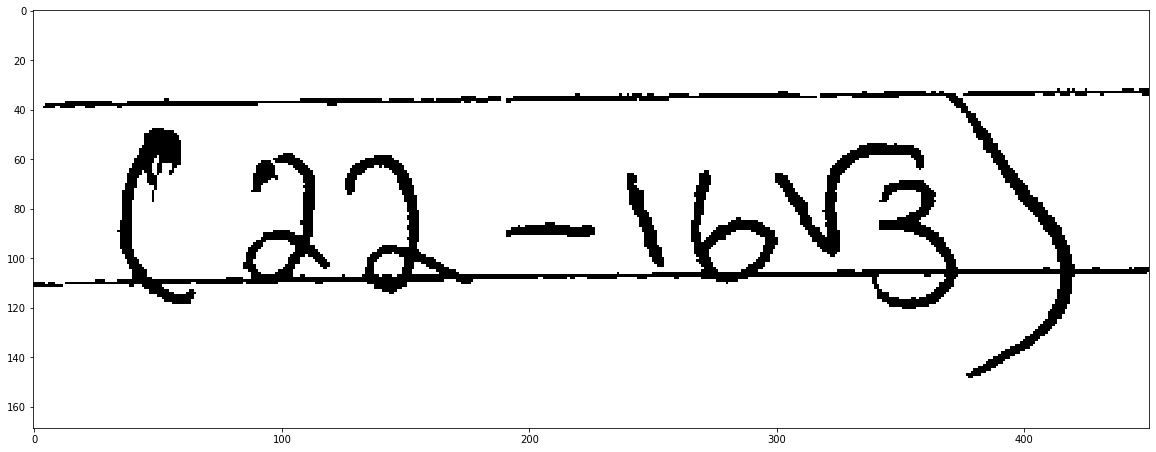

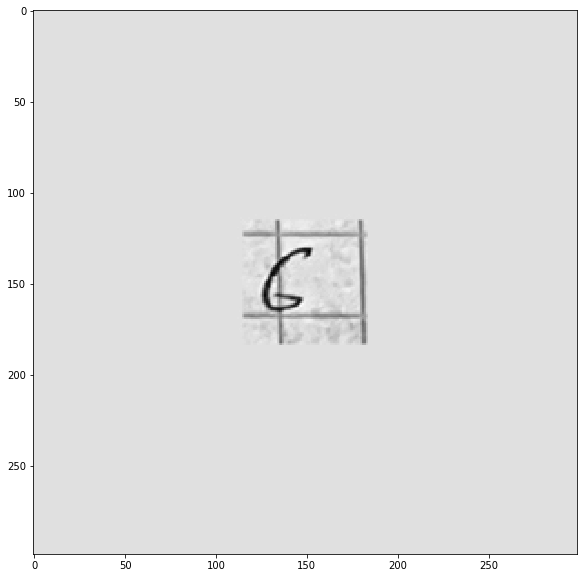

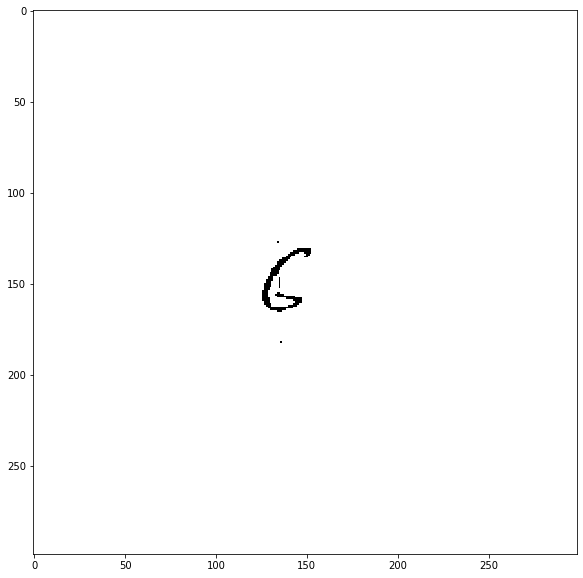

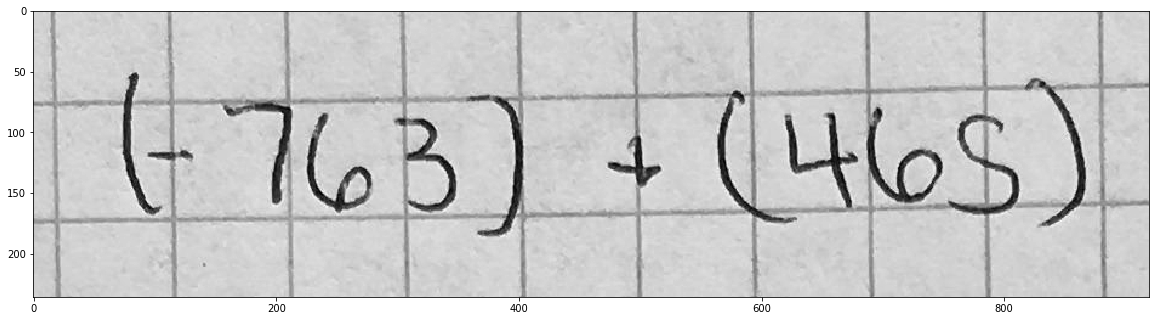

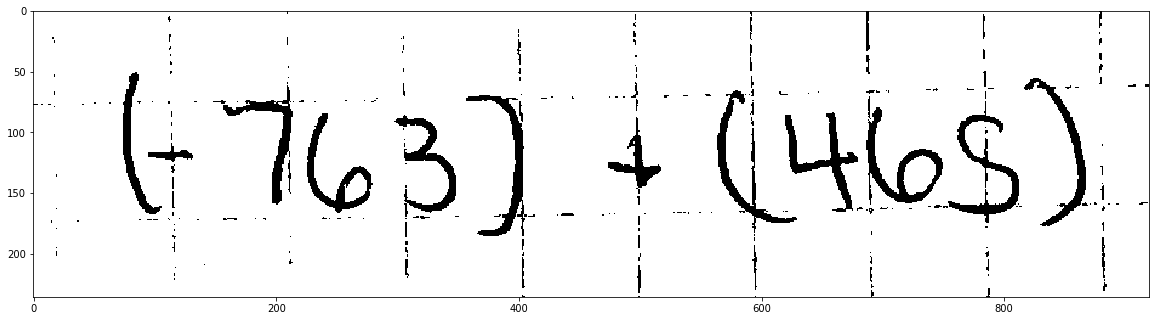

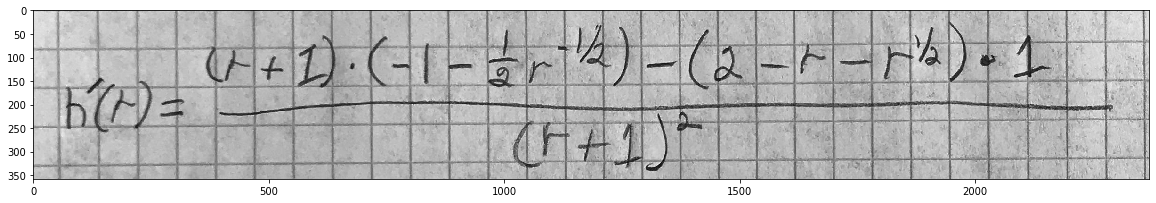

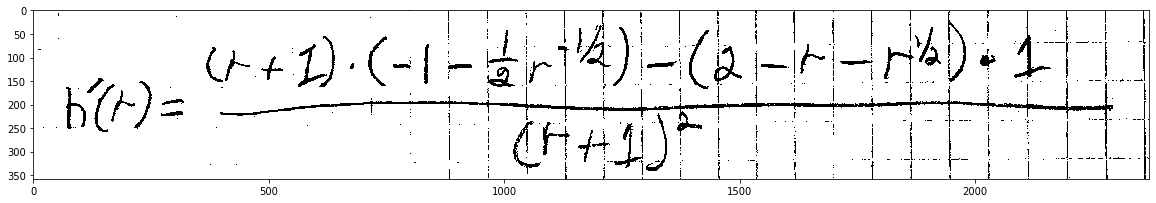

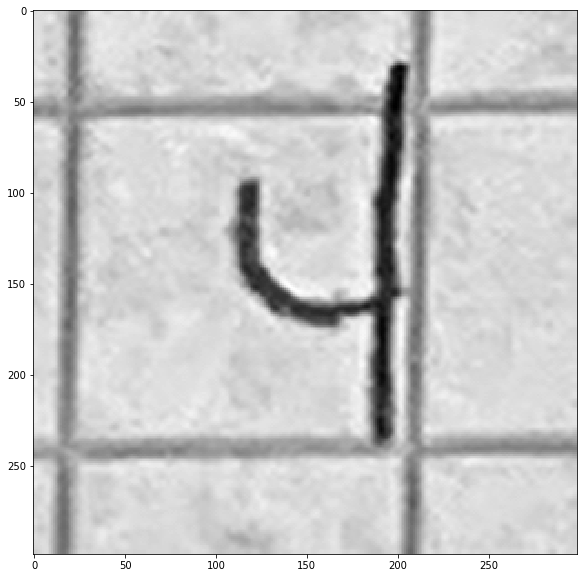

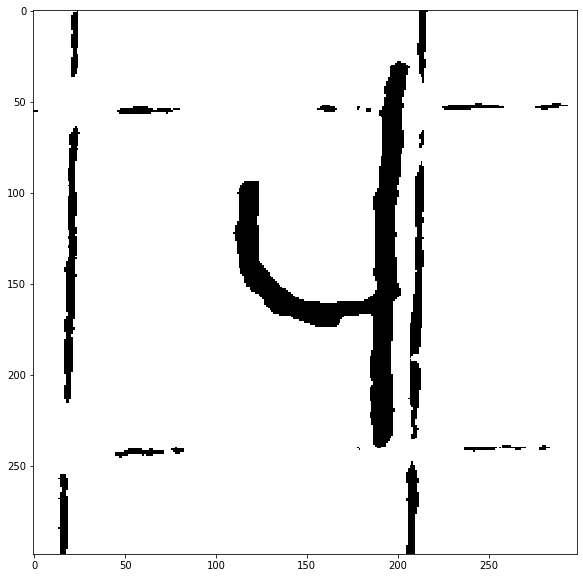

In [207]:
test_dir = 'Test_Images/'

for filename in os.listdir(test_dir):
    
    # read in image
    img = cv2.imread(test_dir + filename)

    # convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.figure(figsize=(20,10))
    plt.imshow(gray_img,cmap='gray');

    # dilate the image in order to get ride of the math
    dilated_img = cv2.dilate(gray_img, np.ones((10,10), np.uint8))

    # show dilated image
    # plt.figure(figsize=(20,10))
    # plt.imshow(dilated_img,cmap='gray');

    ### Step 2: Blur ### 
    # suppress anything else with a blur function

    blur_img = cv2.medianBlur(dilated_img, 21)

    ### Step 3: Calculate the difference between the original and background just made ###
    # identical bits will be black (close to zero difference), text will be white (large difference)

    diff_img = 255 - cv2.absdiff(gray_img, blur_img)

    ### Step 4: Apply Simple Threshold ###
    thresh = 175
    maxValue = 255
    ret, thresh2 = cv2.threshold(diff_img, thresh, maxValue, cv2.THRESH_BINARY)

    ### Other Option - Step 4: Apply Otsu Binarization ###
    thresh = 0
    maxValue = 255
    ret, thresh3 = cv2.threshold(thresh2, thresh, maxValue, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    
    plt.figure(figsize=(20,10))
    plt.imshow(thresh3,cmap='Greys_r');


# Method 3: Hough Transform Application

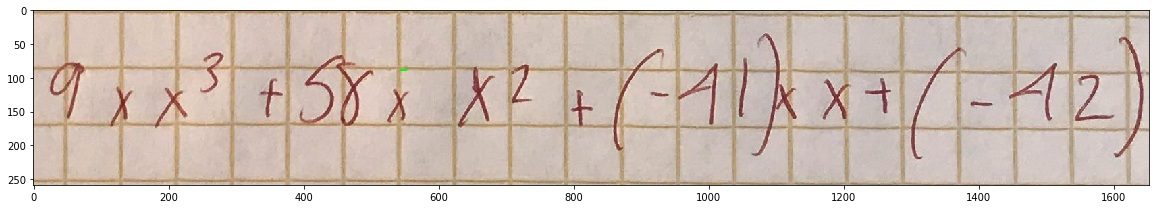

In [231]:
img = cv2.imread("graph_paper_ex.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect edges
edges = cv2.Canny(gray_img,20,150,apertureSize = 3)
minLineLength = 1
maxLineGap = 1
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

    
plt.figure(figsize=(20,10))
plt.imshow(img);

# Detect Paper Type

In [51]:
graph_img = cv2.imread("graph_paper_ex.jpg")
graph_img = cv2.cvtColor(graph_img, cv2.COLOR_BGR2GRAY)

lined_img = cv2.imread("0a9d0070-5970-11e9-8bee-1b2343d95e39_lined_pencil_line_5.jpg")
lined_img = cv2.cvtColor(lined_img, cv2.COLOR_BGR2GRAY)

paper_img = cv2.imread("0a0d0c10-3260-11e9-f034-69d72eadb065_white_pencil_line_4.jpg")
paper_img = cv2.cvtColor(paper_img, cv2.COLOR_BGR2GRAY)

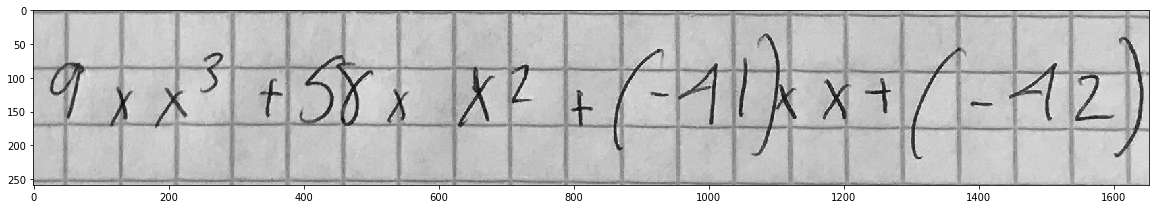

In [54]:
plt.figure(figsize=(20,10))
plt.imshow(graph_img,cmap="gray");

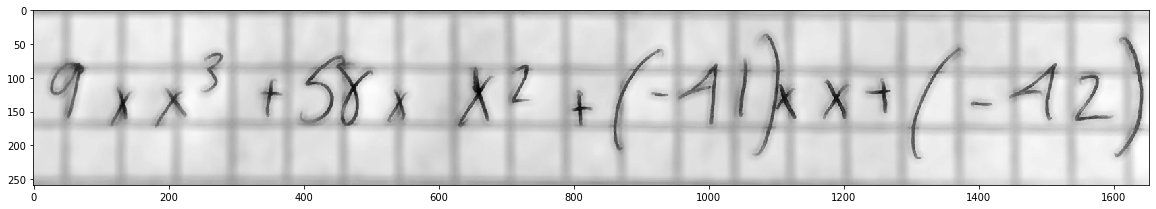

In [56]:
# filter image
graph_img_filt = cv2.bilateralFilter(graph_img, 20, 75, 75)

plt.figure(figsize=(20,10))
plt.imshow(graph_img_filt,cmap="gray");

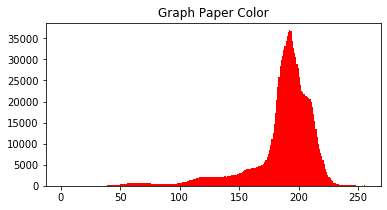

In [59]:
img = cv2.imread("graph_paper_ex.jpg")
plt.figure(figsize=(6,3))
plt.hist(img.ravel(),256,[0,256],color="red")
plt.title("Graph Paper Color")
plt.show()

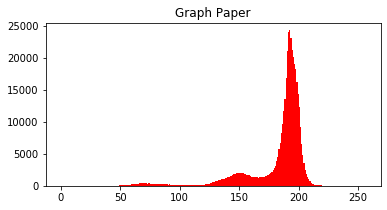

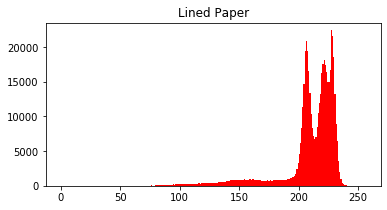

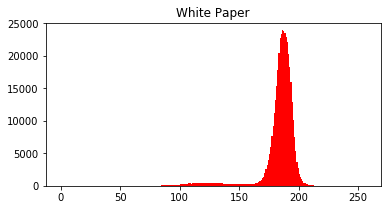

In [57]:
plt.figure(figsize=(6,3))
plt.hist(graph_img.ravel(),256,[0,256],color="red")
plt.title("Graph Paper")
plt.show()

plt.figure(figsize=(6,3))
plt.hist(lined_img.ravel(),256,[0,256],color="red")
plt.title("Lined Paper")
plt.show()

plt.figure(figsize=(6,3))
plt.hist(paper_img.ravel(),256,[0,256],color="red")
plt.title("White Paper")
plt.show()

array([[176, 178, 179, ..., 205, 206, 202],
       [176, 177, 178, ..., 205, 207, 205],
       [175, 176, 176, ..., 204, 205, 206],
       ...,
       [178, 178, 179, ..., 172, 174, 172],
       [178, 179, 179, ..., 166, 166, 166],
       [178, 179, 180, ..., 165, 164, 167]], dtype=uint8)

In [32]:
## use k-means clustering to find the max and min of different clusters
## this will allow me to create ranges for the thresholds
def determineK(image, paper_type):
    """Loops through a list of k-values and plots 
       sum of squared differences at each value""" 
    sum_of_squared_distances = []
    K = [2,3,4]
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(graph_img)
        sum_of_squared_distances.append(km.inertia_)


    plt.figure(figsize=(4,4))
    plt.plot(K, sum_of_squared_distances, 'bx-', marker='o')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title(paper_type)
    plt.show()

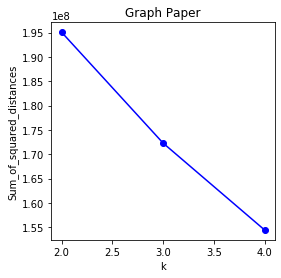

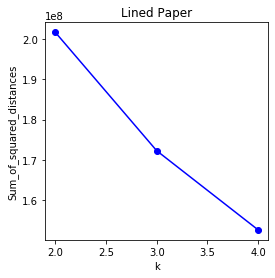

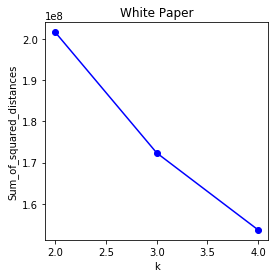

In [33]:
determineK(graph_img, "Graph Paper")
determineK(lined_img, "Lined Paper")
determineK(paper_img, "White Paper")